<h2>Classification Model</h2>

<h3>Objective:</h3>

To classify high-spending customers based on demographics (gender, age group) and purchase attributes (product category and quantity) using the K-Nearest Neighbors algorithm.

We are using the feature-engineered dataset that includes encoded categorical variables, numerical features, and a binary target variable High Spender.

In [1]:
# Import required libraries
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the feature-engineered data
df = pd.read_csv("data/processed/processed_data.csv")
df.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,High Spender,Month,Day of Week,Avg Price per Item,Gender_Male,Product Category_Clothing,Product Category_Electronics,Age Group_25-40,Age Group_40-60,Age Group_60+,Gender_Num,AgeGroup_Num,ProductCategory_Num
0,1,2023-11-24,CUST001,34,3,50,150,0,11,4,50.0,True,False,False,True,False,False,0,2,3
1,2,2023-02-27,CUST002,26,2,500,1000,1,2,0,500.0,False,True,False,True,False,False,1,2,1
2,3,2023-01-13,CUST003,50,1,30,30,0,1,4,30.0,True,False,True,False,True,False,0,3,2
3,4,2023-05-21,CUST004,37,1,500,500,0,5,6,500.0,True,True,False,True,False,False,0,2,1
4,5,2023-05-06,CUST005,30,2,50,100,0,5,5,50.0,True,False,False,True,False,False,0,2,3


In [ ]:
# Select Features and Target Variable

# feature variables
X = df[['Gender_Num', 'AgeGroup_Num', 'ProductCategory_Num', 'Quantity']]



Index(['Transaction ID', 'Date', 'Customer ID', 'Age', 'Quantity',
       'Price per Unit', 'Total Amount', 'High Spender', 'Month',
       'Day of Week', 'Avg Price per Item', 'Gender_Male',
       'Product Category_Clothing', 'Product Category_Electronics',
       'Age Group_25-40', 'Age Group_40-60', 'Age Group_60+', 'Gender_Num',
       'AgeGroup_Num', 'ProductCategory_Num'],
      dtype='object')


**Defining Target variable High Spenders:**

Since we want to classify top-spending customers, we define a new target variable HighSpender.
Any customer whose Total Purchase Amount is in the top 25% of the data (≥ 75th percentile) is labeled as:

1 - High Spender

0 - Otherwise

In [10]:
# Target variable
threshold = df['Total Amount'].quantile(0.75)
df['HighSpender'] = (df['Total Amount'] > threshold).astype(int)

print(df['HighSpender'].value_counts())

y = df['HighSpender']

HighSpender
0    798
1    202
Name: count, dtype: int64


**Split the Data**

We use an 75-25 train-test split to train the model on 75% of the data and test it on 25%.
We also stratify the split to maintain the same class distribution of high spenders vs non-high spenders in both sets.

In [ ]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

**Scale the Features:**

KNN is a distance-based algorithm and is sensitive to the magnitude of features.
We standardize the data using StandardScaler to give each feature a mean of 0 and standard deviation of 1.

KNN is distance-based, so we standardized the features using Z-score normalization:

z= (x−μ)/σ 
 
This ensures no feature (like Quantity) dominates others (like Gender).

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Best value for K:**

To find the best number of neighbors (k), we plot the error rate for values between 1 and 20.
This helps us select the optimal k that balances bias and variance.

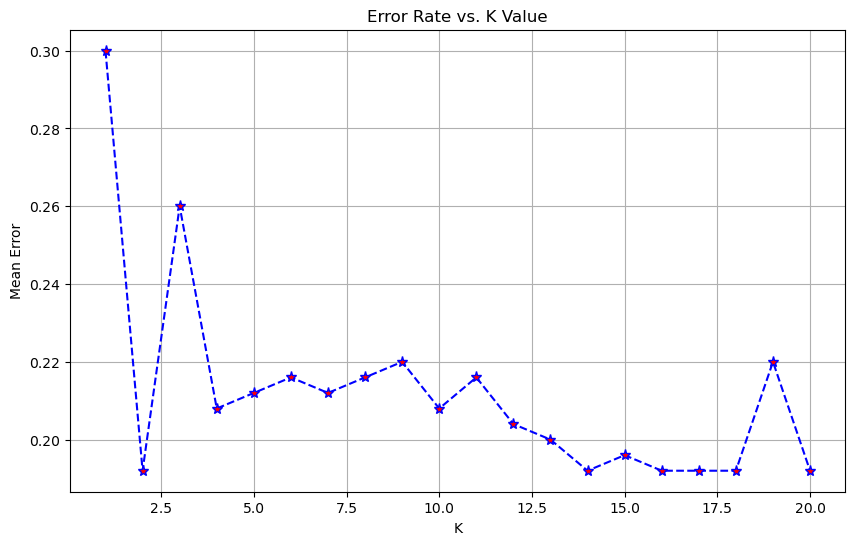

The best value of k is: 2


In [45]:
# Try different values of k to see performance
error_rate = []

for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    pred_k = knn_temp.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k != y_test))

# Plot the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, color='blue', linestyle='dashed', marker='*',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Mean Error')
plt.grid(True)
plt.show()

best_k = error_rate.index(min(error_rate)) + 1  # +1 because range starts at 1
print(f"The best value of k is: {best_k}")
 

**Train KNN**

We create a KNN classifier using k neighbors after finding the best value for K by Hyperparameter Tuning.
KNN works by comparing each test point to the k closest training points and assigning the majority class among them.

**KNN Distance Calculations:**

Compute distance to all training points using Euclidean distance formula:

distance: $d = \sqrt{(x_1 - x_1')^2 + (x_2 - x_2')^2 + \dots + (x_n - x_n')^2}$

It picks K closest points from training set using the above distance.

For classification, KNN checks the most frequent class among the k nearest neighbors.

**Example:**

If k=5 and the nearest neighbors have labels [1, 0, 1, 1, 0] → the predicted label is 1 (majority).

In case of a tie, behavior depends on the implementation (e.g., some libraries break ties by choosing the class with the lower label).

In [46]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [47]:
# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[191   9]
 [ 39  11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       200
           1       0.55      0.22      0.31        50

    accuracy                           0.81       250
   macro avg       0.69      0.59      0.60       250
weighted avg       0.77      0.81      0.77       250

Accuracy Score: 0.808


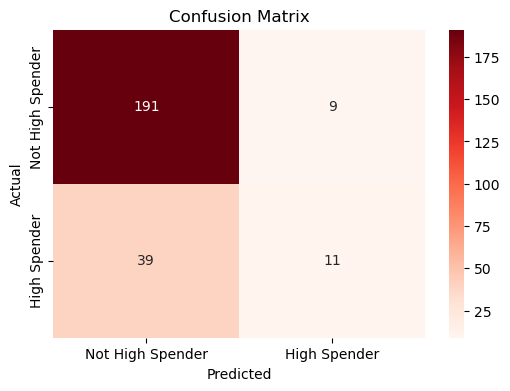

In [53]:
# Visualize confusion matrix using seaborn
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Not High Spender', 'High Spender'],
            yticklabels=['Not High Spender', 'High Spender'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Confusion Matrix Visualization:**

This heatmap shows how well the classifier predicted the two classes:

True Positives (TP): 11 - Correctly predicted high spenders

True Negatives (TN): 191 - Correctly predicted non-high spenders

False Positives (FP): 9 - Non-high spenders misclassified as high

False Negatives (FN): 39 - High spenders missed by the model

It helps identify if the model is biased toward one class or struggles with imbalanced data.

Model Performance Summary

 Metric                              | Value                                                      |
| ----------------------------------- | ---------------------------------------------------------- |
| Best `k`                            | **2**                                                      |
| Accuracy                            | **80.8%**                                                  |
| Precision (High Spenders - Class 1) | **55%**                                                    |
| Recall (High Spenders - Class 1)    | **22%**                                                    |
| F1 Score (High Spenders)            | **31%**                                                    |


**Key Observations:**
* The overall accuracy (81%) is relatively strong — indicating the model performs well in general.

* However, recall for high spenders is low (22%) — the model misses a large portion of actual high spenders. This means it's conservative in flagging someone as a high spender.

* Precision for high spenders is 55% — when the model does predict someone as a high spender, it is right about half the time.

* The model favors majority class (non-high spenders), which is expected due to class imbalance (only 50 out of 250 test samples are high spenders).